<a href="https://colab.research.google.com/github/JulianMejia6/IA_2025/blob/main/palabrasPDF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
!pip install pymupdf
!pip install nltk
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [2]:
from google.colab import files
uploaded = files.upload()

Saving DEBE PERMITIRSE EL USO DE LA INTELIGENCIA ARTIFICIAL EN ESTUDIANTES UNIVERSITARIOS.pdf to DEBE PERMITIRSE EL USO DE LA INTELIGENCIA ARTIFICIAL EN ESTUDIANTES UNIVERSITARIOS.pdf


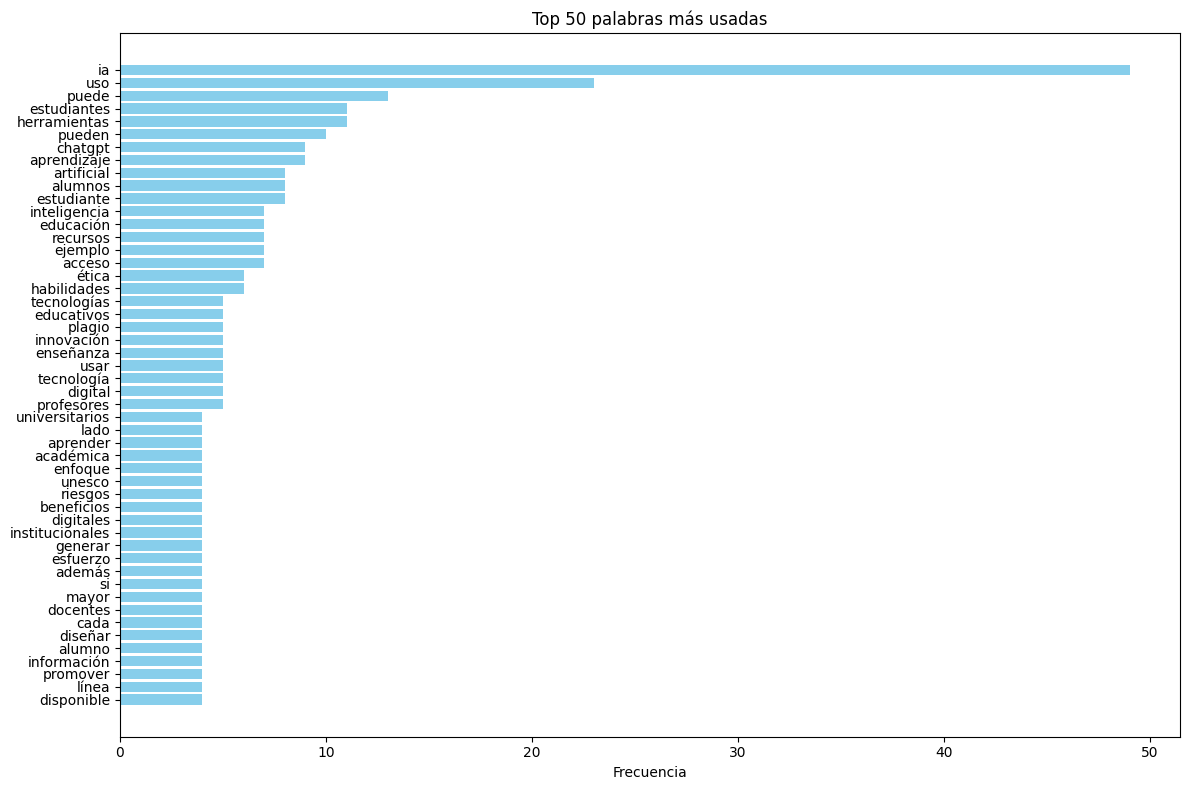

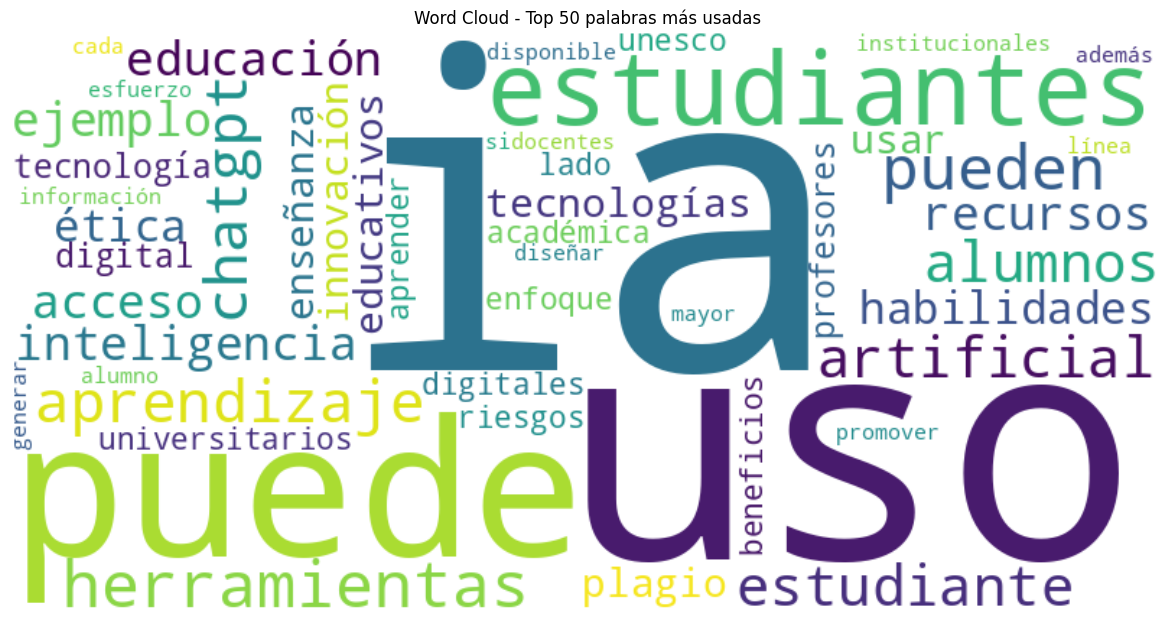

In [24]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import fitz  # PyMuPDF
import re
from nltk.corpus import stopwords
import nltk


# Archivo PDF
pdf_path = "DEBE PERMITIRSE EL USO DE LA INTELIGENCIA ARTIFICIAL EN ESTUDIANTES UNIVERSITARIOS.pdf"
document = fitz.open(pdf_path)

# Extraer texto
texto_completo = ""
for pagina in document:
    texto_completo += pagina.get_text()

solo_letras = re.sub(r'[^a-zA-Záéíóúñ\s]', '', texto_completo)
solo_letras = solo_letras.lower()
palabras = solo_letras.split()

# Stopwords
stop_words = set(stopwords.words('spanish'))

# Filtrar palabras
palabras_filtradas = [palabra for palabra in palabras if palabra not in stop_words]

# Contar palabras filtradas
contador = Counter(palabras_filtradas)

# Obtener top 50 palabras más comunes
top_50 = contador.most_common(50)

# Separar palabras y frecuencias para graficar
palabras_top = [p[0] for p in top_50]
frecuencias_top = [p[1] for p in top_50]

# Crear gráfico de barras
plt.figure(figsize=(12, 8))
plt.barh(palabras_top[::-1], frecuencias_top[::-1], color='skyblue')  # Invertir para que la más frecuente quede arriba
plt.xlabel('Frecuencia')
plt.title('Top 50 palabras más usadas')
plt.tight_layout()
plt.show()

# Convertir la lista de tuplas a diccionario para WordCloud
frecuencias_dict = dict(top_50)

wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate_from_frequencies(frecuencias_dict)

# Mostrar la imagen
plt.figure(figsize=(15, 7.5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Top 50 palabras más usadas')
plt.show()